# Evaluate the contribution of CPL loss using CycPeptMPDB data

In [1]:
# load
import pickle

with open('data/cpp/pred_cpp_perm.pkl', 'rb') as f:
    cpp_perm = pickle.load(f)
    
with open('result/agent/cpp/likelihoods.pkl', 'rb') as f:
    cpp_llh = pickle.load(f)
    

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


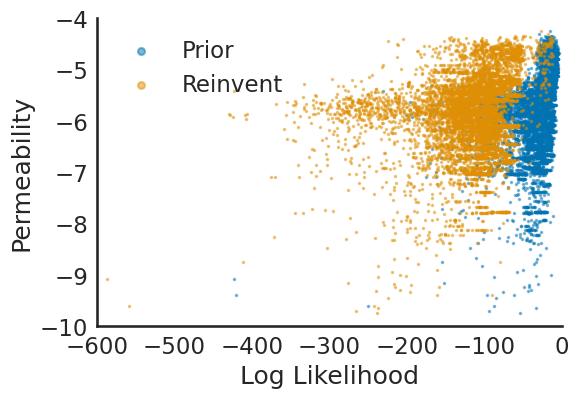

In [2]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.scatter(cpp_llh['cpp_llh_prior'], cpp_perm, s=1, alpha=0.5, label='Prior', color=plot_style_utils.CAT_PALETTE[0])
ax.scatter(cpp_llh['cpp_llh_reinvent'], cpp_perm, s=1, alpha=0.5, label='Reinvent', color=plot_style_utils.CAT_PALETTE[1])

ax.set_xlabel('Log Likelihood')
ax.set_ylabel('Permeability')
# ax.set_title('Reinvent')

ax.set_xlim(-600, 0)
ax.set_ylim(-10, -4)

ax.legend(frameon=False, loc='upper left', markerscale=5)

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/agent_reinvent_llh_vs_perm')


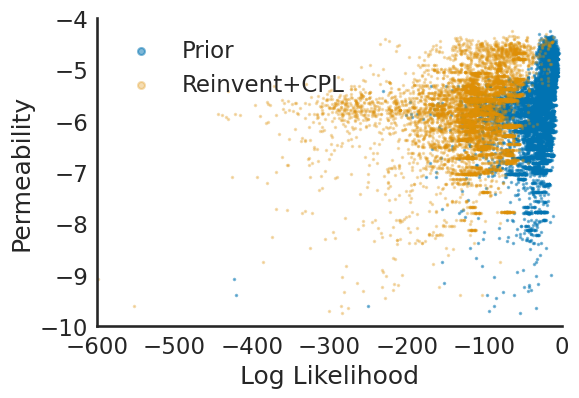

In [3]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.scatter(cpp_llh['cpp_llh_prior'], cpp_perm, s=1, alpha=0.5, label='Prior', color=plot_style_utils.CAT_PALETTE[0])
ax.scatter(cpp_llh['cpp_llh_reinvent_cpl'], cpp_perm, s=1, alpha=0.3, label='Reinvent+CPL', color=plot_style_utils.CAT_PALETTE[1])

ax.set_xlabel('Log Likelihood')
ax.set_ylabel('Permeability')
ax.legend(frameon=False, loc='upper left', markerscale=5)

ax.set_xlim(-600, 0)
ax.set_ylim(-10, -4)

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/agent_reinvent_cpl_llh_vs_perm')


x max 57.037704 x min -117.87738


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


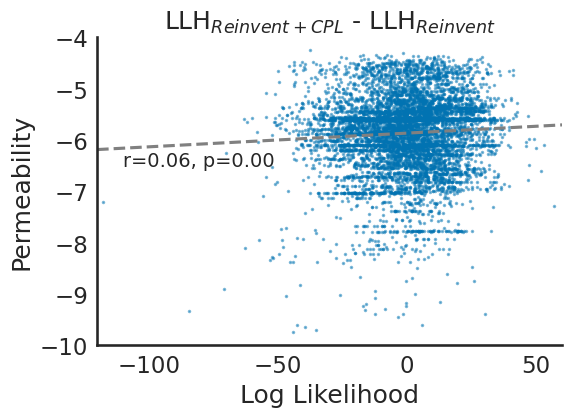

In [4]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

llh_diff = cpp_llh['cpp_llh_reinvent_cpl'] - cpp_llh['cpp_llh_reinvent']
ax.scatter(llh_diff, cpp_perm, s=1, alpha=0.5, label='Prior', color=plot_style_utils.CAT_PALETTE[0])

print('x max', llh_diff.max(), 'x min', llh_diff.min())
ax.set_xlabel('Log Likelihood')
ax.set_ylabel('Permeability')
ax.set_title('LLH$_{Reinvent+CPL}$ - LLH$_{Reinvent}$')

# add regression line
import numpy as np
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(llh_diff, cpp_perm)

x = np.linspace(-120, 60)
y = slope * x + intercept
ax.plot(x, y, color='grey', linestyle='--')
# annotate
ax.text(-110, -6.5, f'r={r_value:.2f}, p={p_value:.2f}', fontsize=14)


ax.set_xlim(-120, 60)
ax.set_ylim(-10, -4)

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/agent_add_cpl_llh_vs_perm')
